# Event catalog

# Import all the data

In [1]:
%matplotlib agg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
# nelder-mead optimization of noisy one-dimensional convex function
from scipy.optimize import minimize
from numpy.random import rand
from scipy import interpolate
import itertools
import time
from scipy import signal
import datetime
from datetime import timedelta, date

## Sismo data KGS09

## Data 2021 

In [3]:
data01_f = pd.read_csv('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/seismo/KGS01/2021_KGS01_EHZ_frequency', header = None)
data01_psd = np.loadtxt('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/seismo/KGS01/2021_KGS01_EHZ_PSD_resampled_ncorr')
data01_time = pd.read_csv('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/seismo/KGS01/2021_KGS01_EHZ_time_resampled', header = None)

## Data 2022

In [4]:
data0122_psd = np.loadtxt('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/seismo/KGS01/2022_KGS01_EHZ_PSD_resampled_nc')
data0122_time = pd.read_csv('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/seismo/KGS01/2022_KGS01_EHZ_time_resampled', header = None)

In [5]:
data01_time[0] = pd.to_datetime(data01_time[0], unit='s')
data01_time[0]

0        2021-01-01 00:00:01
1        2021-01-01 00:02:31
2        2021-01-01 00:05:01
3        2021-01-01 00:07:31
4        2021-01-01 00:10:01
                 ...        
205627   2021-12-31 23:47:31
205628   2021-12-31 23:50:01
205629   2021-12-31 23:52:31
205630   2021-12-31 23:55:01
205631   2021-12-31 23:57:31
Name: 0, Length: 205632, dtype: datetime64[ns]

In [6]:
data0122_time[0] = pd.to_datetime(data0122_time[0], unit='s')
data0122_time

,0
0,2022-01-01 00:00:01.000
1,2022-01-01 00:02:31.000
2,2022-01-01 00:05:01.000
3,2022-01-01 00:07:31.000
4,2022-01-01 00:10:01.000
...,...
80755,2022-08-22 23:52:57.300
80756,2022-08-22 23:55:27.300
80757,2022-08-22 23:57:57.300
80758,2022-08-23 00:00:01.000


In [7]:
data012122_time = pd.concat([data01_time, data0122_time], axis=0, ignore_index=True)

In [9]:
data012122_time[0]

0        2021-01-01 00:00:01.000
1        2021-01-01 00:02:31.000
2        2021-01-01 00:05:01.000
3        2021-01-01 00:07:31.000
4        2021-01-01 00:10:01.000
                   ...          
286387   2022-08-22 23:52:57.300
286388   2022-08-22 23:55:27.300
286389   2022-08-22 23:57:57.300
286390   2022-08-23 00:00:01.000
286391   2022-08-23 00:02:31.000
Name: 0, Length: 286392, dtype: datetime64[ns]

## Concatenate data 2021 and 2022 & Creating spectrogramm for KGS09

In [10]:
data01_f.values.tolist()

[[2.0],
 [3.0],
 [4.0],
 [5.0],
 [6.0],
 [7.0],
 [8.0],
 [9.0],
 [10.0],
 [11.0],
 [12.0],
 [13.0],
 [14.0],
 [15.0],
 [16.0],
 [17.0],
 [18.0],
 [19.0],
 [20.0],
 [21.0],
 [22.0],
 [23.0],
 [24.0],
 [25.0],
 [26.0],
 [27.0],
 [28.0],
 [29.0],
 [30.0],
 [31.0],
 [32.0],
 [33.0],
 [34.0],
 [35.0],
 [36.0],
 [37.0],
 [38.0],
 [39.0],
 [40.0],
 [41.0],
 [42.0],
 [43.0],
 [44.0],
 [45.0],
 [46.0],
 [47.0],
 [48.0],
 [49.0],
 [50.0]]

In [11]:
KGS01_21=pd.DataFrame(data01_psd)
KGS01_21.columns=np.arange(2, 51)

In [12]:
KGS01_22=pd.DataFrame(data0122_psd)
KGS01_22.columns=np.arange(2, 51)

In [13]:
KGS01_21

,2,3,4,5,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.083359,0.853752,0.685482,0.628317,0.530558,0.459250,0.436397,0.385135,0.328995,0.301495,...,-0.254317,-0.505417,-0.902689,-1.361030,-1.892291,-2.377005,-2.543711,-2.578302,-2.576451,-2.924772
2,1.243529,0.998708,0.896157,0.805667,0.679404,0.659064,0.650896,0.556987,0.514129,0.508495,...,-0.082651,-0.347749,-0.739154,-1.184331,-1.726237,-2.142496,-2.314291,-2.361842,-2.376599,-2.750859
3,1.255245,1.072742,0.934554,0.812562,0.716326,0.638734,0.614509,0.563342,0.504855,0.483645,...,-0.099521,-0.406428,-0.769438,-1.202642,-1.757586,-2.136575,-2.308487,-2.362659,-2.388829,-2.765874
4,1.068893,0.916068,0.755007,0.641573,0.528941,0.438523,0.394977,0.384673,0.325399,0.284352,...,-0.270972,-0.546663,-0.914914,-1.388016,-1.954051,-2.378427,-2.559090,-2.580810,-2.571006,-2.925895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205627,1.139737,0.926216,0.738703,0.614729,0.484377,0.471191,0.423152,0.355631,0.271460,0.255242,...,-0.295688,-0.548973,-0.921260,-1.429100,-2.004714,-2.407257,-2.547563,-2.606728,-2.642920,-3.046063
205628,1.151787,0.898657,0.715303,0.585240,0.460411,0.455854,0.362289,0.329620,0.306003,0.256247,...,-0.306036,-0.562451,-0.903711,-1.399833,-1.946885,-2.342643,-2.548640,-2.626211,-2.605307,-2.976256
205629,1.160808,0.911414,0.743139,0.632815,0.455005,0.402792,0.337346,0.278352,0.282058,0.275850,...,-0.279313,-0.565198,-0.922341,-1.364913,-1.916753,-2.342007,-2.516819,-2.603988,-2.606241,-2.945238
205630,1.174831,0.914752,0.752764,0.651743,0.482753,0.421324,0.357748,0.252157,0.260690,0.250165,...,-0.294615,-0.574153,-0.931059,-1.385418,-1.932097,-2.397935,-2.494489,-2.596362,-2.667808,-3.020171


In [14]:
KGS01_22

,2,3,4,5,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.157686,0.902833,0.758571,0.652172,0.507558,0.401740,0.367901,0.285320,0.270573,0.213725,...,-0.335671,-0.582500,-0.953970,-1.402252,-1.940968,-2.440423,-2.568209,-2.583778,-2.621455,-3.026533
2,1.244504,1.008914,0.896389,0.799630,0.635029,0.540473,0.513589,0.445452,0.432902,0.388654,...,-0.217043,-0.445016,-0.765338,-1.264801,-1.818303,-2.309139,-2.457871,-2.478421,-2.534651,-2.976668
3,1.263443,1.016556,0.909150,0.797159,0.605302,0.573198,0.536975,0.468976,0.427920,0.376865,...,-0.168960,-0.448287,-0.799427,-1.260736,-1.821633,-2.315444,-2.462370,-2.488688,-2.553918,-2.997405
4,1.151311,0.891537,0.759762,0.606809,0.439542,0.434891,0.377865,0.296101,0.269780,0.245668,...,-0.278470,-0.588148,-0.974880,-1.392303,-1.921332,-2.409225,-2.537999,-2.638760,-2.681039,-3.049170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80755,0.961615,0.784373,0.694813,0.560623,0.511255,0.433227,0.339656,0.350065,0.309385,0.269786,...,-0.243312,-0.453870,-0.800610,-1.331443,-1.940511,-2.379104,-2.588333,-2.715488,-2.804230,-3.210067
80756,0.953023,0.772412,0.684611,0.559514,0.509745,0.489482,0.404527,0.381517,0.332076,0.282336,...,-0.240736,-0.432894,-0.785274,-1.320156,-1.945007,-2.336468,-2.578570,-2.725634,-2.838653,-3.233781
80757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
time21 = pd.to_datetime(data01_time[0], unit='s')
time21

0        2021-01-01 00:00:01
1        2021-01-01 00:02:31
2        2021-01-01 00:05:01
3        2021-01-01 00:07:31
4        2021-01-01 00:10:01
                 ...        
205627   2021-12-31 23:47:31
205628   2021-12-31 23:50:01
205629   2021-12-31 23:52:31
205630   2021-12-31 23:55:01
205631   2021-12-31 23:57:31
Name: 0, Length: 205632, dtype: datetime64[ns]

In [16]:
time22 = pd.to_datetime(data0122_time[0], unit='s')
time22

0       2022-01-01 00:00:01.000
1       2022-01-01 00:02:31.000
2       2022-01-01 00:05:01.000
3       2022-01-01 00:07:31.000
4       2022-01-01 00:10:01.000
                  ...          
80755   2022-08-22 23:52:57.300
80756   2022-08-22 23:55:27.300
80757   2022-08-22 23:57:57.300
80758   2022-08-23 00:00:01.000
80759   2022-08-23 00:02:31.000
Name: 0, Length: 80760, dtype: datetime64[ns]

In [17]:
df_KGS01_22 = pd.concat([time22, KGS01_22], axis=1)
df_KGS01_22.rename(columns={df_KGS01_22.columns[0]: 'Time'}, inplace = True)

In [18]:
df_KGS01_22

,Time,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,2022-01-01 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:02:31.000,1.157686,0.902833,0.758571,0.652172,0.507558,0.401740,0.367901,0.285320,0.270573,...,-0.335671,-0.582500,-0.953970,-1.402252,-1.940968,-2.440423,-2.568209,-2.583778,-2.621455,-3.026533
2,2022-01-01 00:05:01.000,1.244504,1.008914,0.896389,0.799630,0.635029,0.540473,0.513589,0.445452,0.432902,...,-0.217043,-0.445016,-0.765338,-1.264801,-1.818303,-2.309139,-2.457871,-2.478421,-2.534651,-2.976668
3,2022-01-01 00:07:31.000,1.263443,1.016556,0.909150,0.797159,0.605302,0.573198,0.536975,0.468976,0.427920,...,-0.168960,-0.448287,-0.799427,-1.260736,-1.821633,-2.315444,-2.462370,-2.488688,-2.553918,-2.997405
4,2022-01-01 00:10:01.000,1.151311,0.891537,0.759762,0.606809,0.439542,0.434891,0.377865,0.296101,0.269780,...,-0.278470,-0.588148,-0.974880,-1.392303,-1.921332,-2.409225,-2.537999,-2.638760,-2.681039,-3.049170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80755,2022-08-22 23:52:57.300,0.961615,0.784373,0.694813,0.560623,0.511255,0.433227,0.339656,0.350065,0.309385,...,-0.243312,-0.453870,-0.800610,-1.331443,-1.940511,-2.379104,-2.588333,-2.715488,-2.804230,-3.210067
80756,2022-08-22 23:55:27.300,0.953023,0.772412,0.684611,0.559514,0.509745,0.489482,0.404527,0.381517,0.332076,...,-0.240736,-0.432894,-0.785274,-1.320156,-1.945007,-2.336468,-2.578570,-2.725634,-2.838653,-3.233781
80757,2022-08-22 23:57:57.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80758,2022-08-23 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_KGS01_22_sorted = df_KGS01_22.sort_values(by='Time')

In [21]:
df_KGS01_22_sorted

,Time,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,2022-01-01 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:02:31.000,1.157686,0.902833,0.758571,0.652172,0.507558,0.401740,0.367901,0.285320,0.270573,...,-0.335671,-0.582500,-0.953970,-1.402252,-1.940968,-2.440423,-2.568209,-2.583778,-2.621455,-3.026533
2,2022-01-01 00:05:01.000,1.244504,1.008914,0.896389,0.799630,0.635029,0.540473,0.513589,0.445452,0.432902,...,-0.217043,-0.445016,-0.765338,-1.264801,-1.818303,-2.309139,-2.457871,-2.478421,-2.534651,-2.976668
3,2022-01-01 00:07:31.000,1.263443,1.016556,0.909150,0.797159,0.605302,0.573198,0.536975,0.468976,0.427920,...,-0.168960,-0.448287,-0.799427,-1.260736,-1.821633,-2.315444,-2.462370,-2.488688,-2.553918,-2.997405
4,2022-01-01 00:10:01.000,1.151311,0.891537,0.759762,0.606809,0.439542,0.434891,0.377865,0.296101,0.269780,...,-0.278470,-0.588148,-0.974880,-1.392303,-1.921332,-2.409225,-2.537999,-2.638760,-2.681039,-3.049170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80755,2022-08-22 23:52:57.300,0.961615,0.784373,0.694813,0.560623,0.511255,0.433227,0.339656,0.350065,0.309385,...,-0.243312,-0.453870,-0.800610,-1.331443,-1.940511,-2.379104,-2.588333,-2.715488,-2.804230,-3.210067
80756,2022-08-22 23:55:27.300,0.953023,0.772412,0.684611,0.559514,0.509745,0.489482,0.404527,0.381517,0.332076,...,-0.240736,-0.432894,-0.785274,-1.320156,-1.945007,-2.336468,-2.578570,-2.725634,-2.838653,-3.233781
80757,2022-08-22 23:57:57.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80758,2022-08-23 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_KGS01_21 = pd.concat([time21, KGS01_21], axis=1)
df_KGS01_21.rename(columns={df_KGS01_21.columns[0]: 'Time'}, inplace = True)

In [25]:
df_KGS01_21_sorted = df_KGS01_21.sort_values(by='Time')

In [26]:
df_KGS01_21_sorted 

,Time,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,2021-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:02:31,1.083359,0.853752,0.685482,0.628317,0.530558,0.459250,0.436397,0.385135,0.328995,...,-0.254317,-0.505417,-0.902689,-1.361030,-1.892291,-2.377005,-2.543711,-2.578302,-2.576451,-2.924772
2,2021-01-01 00:05:01,1.243529,0.998708,0.896157,0.805667,0.679404,0.659064,0.650896,0.556987,0.514129,...,-0.082651,-0.347749,-0.739154,-1.184331,-1.726237,-2.142496,-2.314291,-2.361842,-2.376599,-2.750859
3,2021-01-01 00:07:31,1.255245,1.072742,0.934554,0.812562,0.716326,0.638734,0.614509,0.563342,0.504855,...,-0.099521,-0.406428,-0.769438,-1.202642,-1.757586,-2.136575,-2.308487,-2.362659,-2.388829,-2.765874
4,2021-01-01 00:10:01,1.068893,0.916068,0.755007,0.641573,0.528941,0.438523,0.394977,0.384673,0.325399,...,-0.270972,-0.546663,-0.914914,-1.388016,-1.954051,-2.378427,-2.559090,-2.580810,-2.571006,-2.925895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205627,2021-12-31 23:47:31,1.139737,0.926216,0.738703,0.614729,0.484377,0.471191,0.423152,0.355631,0.271460,...,-0.295688,-0.548973,-0.921260,-1.429100,-2.004714,-2.407257,-2.547563,-2.606728,-2.642920,-3.046063
205628,2021-12-31 23:50:01,1.151787,0.898657,0.715303,0.585240,0.460411,0.455854,0.362289,0.329620,0.306003,...,-0.306036,-0.562451,-0.903711,-1.399833,-1.946885,-2.342643,-2.548640,-2.626211,-2.605307,-2.976256
205629,2021-12-31 23:52:31,1.160808,0.911414,0.743139,0.632815,0.455005,0.402792,0.337346,0.278352,0.282058,...,-0.279313,-0.565198,-0.922341,-1.364913,-1.916753,-2.342007,-2.516819,-2.603988,-2.606241,-2.945238
205630,2021-12-31 23:55:01,1.174831,0.914752,0.752764,0.651743,0.482753,0.421324,0.357748,0.252157,0.260690,...,-0.294615,-0.574153,-0.931059,-1.385418,-1.932097,-2.397935,-2.494489,-2.596362,-2.667808,-3.020171


In [27]:
df_KGS01_2122=pd.concat([df_KGS01_21_sorted, df_KGS01_22_sorted], axis=0, ignore_index=True)
df_KGS01_2122

,Time,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,2021-01-01 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:02:31.000,1.083359,0.853752,0.685482,0.628317,0.530558,0.459250,0.436397,0.385135,0.328995,...,-0.254317,-0.505417,-0.902689,-1.361030,-1.892291,-2.377005,-2.543711,-2.578302,-2.576451,-2.924772
2,2021-01-01 00:05:01.000,1.243529,0.998708,0.896157,0.805667,0.679404,0.659064,0.650896,0.556987,0.514129,...,-0.082651,-0.347749,-0.739154,-1.184331,-1.726237,-2.142496,-2.314291,-2.361842,-2.376599,-2.750859
3,2021-01-01 00:07:31.000,1.255245,1.072742,0.934554,0.812562,0.716326,0.638734,0.614509,0.563342,0.504855,...,-0.099521,-0.406428,-0.769438,-1.202642,-1.757586,-2.136575,-2.308487,-2.362659,-2.388829,-2.765874
4,2021-01-01 00:10:01.000,1.068893,0.916068,0.755007,0.641573,0.528941,0.438523,0.394977,0.384673,0.325399,...,-0.270972,-0.546663,-0.914914,-1.388016,-1.954051,-2.378427,-2.559090,-2.580810,-2.571006,-2.925895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,2022-08-22 23:52:57.300,0.961615,0.784373,0.694813,0.560623,0.511255,0.433227,0.339656,0.350065,0.309385,...,-0.243312,-0.453870,-0.800610,-1.331443,-1.940511,-2.379104,-2.588333,-2.715488,-2.804230,-3.210067
286388,2022-08-22 23:55:27.300,0.953023,0.772412,0.684611,0.559514,0.509745,0.489482,0.404527,0.381517,0.332076,...,-0.240736,-0.432894,-0.785274,-1.320156,-1.945007,-2.336468,-2.578570,-2.725634,-2.838653,-3.233781
286389,2022-08-22 23:57:57.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286390,2022-08-23 00:00:01.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_KGS01_2122.set_index('Time', inplace=True)

In [29]:
mask=(df_KGS01_2122.index >= '2021-06-15 00:00:00')
df_KGS01_2122_spect = df_KGS01_2122.loc[mask]

In [30]:
df_KGS01_2122_spect_10M = df_KGS01_2122_spect.resample('10Min').mean()
df_KGS01_2122_spect_10D = df_KGS01_2122_spect.resample('D').mean()

In [31]:
df_KGS01_2122_spect_10M.reset_index(inplace=True)
df_KGS01_2122_spect_10D.reset_index(inplace=True)

In [32]:
df_KGS01_2122_spect_10M

,Time,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,2021-06-15 00:00:00,1.265620,1.019886,0.854670,0.729208,0.637025,0.579319,0.552088,0.518769,0.451305,...,-0.186613,-0.456064,-0.822337,-1.334922,-1.888193,-2.338233,-2.481723,-2.494601,-2.520790,-2.888000
1,2021-06-15 00:10:00,1.172709,0.895994,0.725962,0.641178,0.529694,0.474323,0.411545,0.375348,0.351514,...,-0.258900,-0.503183,-0.862941,-1.357873,-1.899491,-2.357189,-2.551571,-2.568311,-2.570582,-2.939478
2,2021-06-15 00:20:00,1.241102,0.994756,0.782348,0.641096,0.514452,0.457721,0.422289,0.376313,0.322599,...,-0.260842,-0.512211,-0.861284,-1.347644,-1.941936,-2.434757,-2.542683,-2.568053,-2.572732,-2.952167
3,2021-06-15 00:30:00,1.238932,1.037861,0.857413,0.711526,0.587252,0.510558,0.446675,0.408455,0.366991,...,-0.261694,-0.523973,-0.883428,-1.391801,-1.941477,-2.398023,-2.574841,-2.565201,-2.559661,-2.937916
4,2021-06-15 00:40:00,1.236076,1.028249,0.796658,0.641150,0.545456,0.474273,0.402022,0.353050,0.318693,...,-0.278252,-0.527235,-0.868405,-1.369725,-1.950577,-2.398123,-2.526820,-2.567254,-2.596133,-2.988532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62492,2022-08-22 23:20:00,0.975170,0.797447,0.656641,0.555191,0.479039,0.449470,0.387523,0.344769,0.313488,...,-0.246262,-0.486334,-0.866078,-1.298876,-1.867043,-2.384502,-2.572282,-2.644481,-2.738645,-3.175920
62493,2022-08-22 23:30:00,0.971152,0.773438,0.659661,0.553290,0.489075,0.426099,0.381699,0.323653,0.314812,...,-0.242504,-0.492302,-0.863650,-1.318099,-1.911142,-2.420101,-2.606912,-2.683597,-2.763153,-3.178461
62494,2022-08-22 23:40:00,0.969604,0.763331,0.634788,0.540430,0.480270,0.425328,0.376143,0.329356,0.293497,...,-0.231070,-0.496310,-0.816596,-1.289845,-1.904216,-2.402171,-2.623122,-2.700851,-2.784518,-3.219214
62495,2022-08-22 23:50:00,0.955773,0.772597,0.682124,0.557146,0.500333,0.452976,0.360487,0.347252,0.307795,...,-0.244302,-0.456712,-0.806779,-1.330043,-1.926918,-2.367760,-2.595568,-2.713403,-2.805313,-3.215049


In [33]:
df_KGS01_2122_spect_10M['Time']=df_KGS01_2122_spect_10M['Time'].dt.date
df_KGS01_2122_spect_10D['Time']=df_KGS01_2122_spect_10D['Time'].dt.date


In [34]:
df_KGS01_2122_spect_10M.set_index('Time', inplace=True)
df_KGS01_2122_spect_10D.set_index('Time', inplace=True)


In [35]:
df_KGS01_2122_spect_10D

,2,3,4,5,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-15,1.198991,0.977989,0.781855,0.657816,0.563174,0.489098,0.431445,0.387308,0.346292,0.306620,...,-0.276124,-0.520690,-0.881235,-1.368745,-1.944310,-2.410129,-2.584258,-2.642027,-2.692816,-3.095857
2021-06-16,1.218604,1.017995,0.797837,0.672017,0.583623,0.502559,0.438122,0.393286,0.354164,0.318695,...,-0.273550,-0.516686,-0.878799,-1.365586,-1.941548,-2.409562,-2.582758,-2.636215,-2.678278,-3.079944
2021-06-17,1.211377,1.034253,0.808921,0.672835,0.580842,0.502297,0.437817,0.390190,0.358216,0.320644,...,-0.274400,-0.520075,-0.882543,-1.370446,-1.944237,-2.411461,-2.583461,-2.630839,-2.668065,-3.067937
2021-06-18,1.123317,0.947715,0.760802,0.644060,0.559269,0.490351,0.435606,0.391625,0.351815,0.314007,...,-0.274471,-0.516538,-0.879138,-1.367411,-1.944129,-2.411405,-2.587891,-2.645921,-2.692817,-3.096157
2021-06-19,1.187144,1.005556,0.801508,0.675913,0.589195,0.515397,0.454922,0.409430,0.371560,0.333926,...,-0.271131,-0.515308,-0.875902,-1.363773,-1.941817,-2.407452,-2.582906,-2.638066,-2.686215,-3.092191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_KGS01_2122_spect_10D.T[::-1]

Time,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,...,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23
50,-3.095857,-3.079944,-3.067937,-3.096157,-3.092191,-3.072395,-3.076321,-3.096189,-3.091328,-3.068237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.076134,NaN
49,-2.692816,-2.678278,-2.668065,-2.692817,-2.686215,-2.672214,-2.674250,-2.687772,-2.689683,-2.669334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.674132,NaN
48,-2.642027,-2.636215,-2.630839,-2.645921,-2.638066,-2.634617,-2.634032,-2.639933,-2.643123,-2.632155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.633316,NaN
47,-2.584258,-2.582758,-2.583461,-2.587891,-2.582906,-2.584466,-2.581463,-2.581396,-2.587916,-2.585850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.579611,NaN
46,-2.410129,-2.409562,-2.411461,-2.411405,-2.407452,-2.410993,-2.408776,-2.406326,-2.410847,-2.413217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.393980,NaN
45,-1.944310,-1.941548,-1.944237,-1.944129,-1.941817,-1.943229,-1.942389,-1.938076,-1.940295,-1.940482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.905827,NaN
44,-1.368745,-1.365586,-1.370446,-1.367411,-1.363773,-1.368550,-1.365165,-1.360756,-1.364585,-1.364947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.322931,NaN
43,-0.881235,-0.878799,-0.882543,-0.879138,-0.875902,-0.882036,-0.878392,-0.873674,-0.880217,-0.878396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.834945,NaN
42,-0.520690,-0.516686,-0.520075,-0.516538,-0.515308,-0.518109,-0.515267,-0.510935,-0.519147,-0.517550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.475252,NaN
41,-0.276124,-0.273550,-0.274400,-0.274471,-0.271131,-0.273322,-0.272014,-0.268028,-0.273502,-0.270271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.232538,NaN


In [98]:
%matplotlib agg
import seaborn as sns
from functools import partial
fig, ax = plt.subplots(figsize = (20,10)) 
# ax.set(yscale="log")
ax.set_yscale('function', functions=(partial(np.power, 1.07), np.log10))

fig = sns.heatmap(df_KGS01_2122_spect_10D.T[::-1]*10, cmap='seismic',
                  vmin=-10, 
                  vmax=25,
                  xticklabels = 50,
                  yticklabels = 7,
                  # tick_params = 
                  ax=ax,
                  mask=df_KGS01_2122_spect_10D.T[::-1].isnull(),
                  cbar_kws={'label': 'Seismic power (dB)', 'orientation':'horizontal', 'pad':0.06, 'shrink':0.25, })

ax.figure.axes[-1].xaxis.label.set_size(15)
ax.figure.axes[-1].tick_params(axis='x', labelsize=15)

ax.set_ylabel('Frequency (Hz)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.axhline(y=47.5, color='k')
ax.axhline(y=40.5, color='k')
ax.text(0.005, 0.42, 'Hydraulogical tremor', color='k', fontsize=15, transform=ax.transAxes)
# ax.set_yscale('log')
ax.set_xlabel('')
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/spectrogram_KGS01_2122D.pdf', bbox_inches='tight')

## Plot raw data

In [54]:
df['TIMESTAMP']

0       2021-06-15 00:00:00
1       2021-06-15 00:10:00
2       2021-06-15 00:20:00
3       2021-06-15 00:30:00
4       2021-06-15 00:40:00
                ...        
35401   2022-02-15 20:10:00
35402   2022-02-15 20:20:00
35403   2022-02-15 20:30:00
35404   2022-02-15 20:40:00
35405   2022-02-15 20:50:00
Name: TIMESTAMP, Length: 35406, dtype: datetime64[ns]

In [55]:
df['TIMESTAMP']

0       2021-06-15 00:00:00
1       2021-06-15 00:10:00
2       2021-06-15 00:20:00
3       2021-06-15 00:30:00
4       2021-06-15 00:40:00
                ...        
35401   2022-02-15 20:10:00
35402   2022-02-15 20:20:00
35403   2022-02-15 20:30:00
35404   2022-02-15 20:40:00
35405   2022-02-15 20:50:00
Name: TIMESTAMP, Length: 35406, dtype: datetime64[ns]

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(8, 9))
axs[0].plot(df['TIMESTAMP'], df['Force'], 'r')
axs[0].set_ylabel('Force (N)')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=True,      # ticks along the bottom edge are off
    labelbottom=False)

axs[1].plot(df['TIMESTAMP'], df['Pe'], 'g')
axs[1].set_ylabel('Pe (MPa)')

fig = sns.heatmap(df_KGS09_2122_spect_10D.T[::-1]*10, cmap='seismic',
                  vmin=-10, 
                  vmax=25,
                  xticklabels = 40,
                  yticklabels = 5,
                  ax=axs[2],
                  mask=df_KGS09_2122_spect_10D.T[::-1].isnull(),
                  cbar_kws={'label': 'Seismic power (dB)', 'orientation':'horizontal', 'pad':0.15, 'shrink':0.5})
axs[2].tick_params(axis='x', rotation=0)
axs[2].set_ylabel('Frequency (Hz)')    
axs[2].set_xlabel('')

# sns.heatmap(KGS09_spect_10M.T[::-1]*10, cmap='seismic', vmin=-10, 
#                   vmax=25, ax=axs[2], xticklabels = 2000, yticklabels = 5,
#                  cbar_kws={'label': 'Seismic power (dB)'})

# axs[2].plot(df['TIMESTAMP'], df['kgs03_3_10'], 'b')
# axs[2].set_ylabel('Seismic power (dB)\n[3-10Hz]')

# axs[3].plot(df['TIMESTAMP'], df['kgs03_30_45'], 'b')
# axs[3].set_ylabel('Seismic power (dB)\n[30-45Hz]')

# axs[4].plot(df['TIMESTAMP'], df['kgs09_3_10'], color='skyblue')
# axs[4].set_ylabel('Seismic power (dB)\n[3-10Hz]')

# axs[5].plot(df['TIMESTAMP'], df['kgs09_30_45'], color='skyblue')
# axs[5].set_ylabel('Seismic power (dB)\n[30-45Hz]')
# plt.tight_layout()
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/raw_data_plough_sismo2122.pdf', bbox_inches='tight')

In [57]:
df

,TIMESTAMP,Time,Force,Pe,kgs09_30_45
0,2021-06-15 00:00:00,37.000000,74.583160,2.798373,2.975580
1,2021-06-15 00:10:00,37.006944,74.557700,2.798397,2.887700
2,2021-06-15 00:20:00,37.013889,74.554782,2.798476,2.731713
3,2021-06-15 00:30:00,37.020833,74.573301,2.798539,2.576763
4,2021-06-15 00:40:00,37.027778,74.580280,2.798597,2.942168
...,...,...,...,...,...
35401,2022-02-15 20:10:00,282.840278,168.663925,2.938275,6.731601
35402,2022-02-15 20:20:00,282.847222,168.655787,2.938237,6.795357
35403,2022-02-15 20:30:00,282.854167,168.648453,2.938243,7.034543
35404,2022-02-15 20:40:00,282.861111,168.634007,2.938246,7.801011


In [58]:
df[df.columns[2]]

0         74.583160
1         74.557700
2         74.554782
3         74.573301
4         74.580280
            ...    
35401    168.663925
35402    168.655787
35403    168.648453
35404    168.634007
35405    168.635185
Name: Force, Length: 35406, dtype: float64

# Fit fonction to curve for filtering 

In [59]:
df.dropna(inplace=True)

In [60]:
# df_fit=np.DataFrame()
for i in np.arange(2, df.shape[1]):
    fit= np.polyfit(np.arange(df.index.shape[0]), df[df.columns[i]], deg=1)
    function= np.poly1d(fit)
    globals()['fit_%s'%df.columns[i]]=function(df.index.shape[0])

# Filter all the data following a 5h to 1.5 day frequency

In [61]:
ts=df['Time'][1]-df['Time'][0]
fs=1/ts
ts

0.0069444444444428655

In [62]:
b = signal.butter(4, [1/1.5, 1/0.3]/fs, 'band')[0]
a = signal.butter(4, [1/1.5, 1/0.3]/fs, 'band')[1]

In [63]:
for i in np.arange(2, df.shape[1]):
    globals()['filterbandpass_%s_diurnal'%df.columns[i]]=signal.filtfilt(b, a, df[df.columns[i]])

In [64]:
'%s'%df.columns[2]

'Force'

In [65]:
df

,TIMESTAMP,Time,Force,Pe,kgs09_30_45
0,2021-06-15 00:00:00,37.000000,74.583160,2.798373,2.975580
1,2021-06-15 00:10:00,37.006944,74.557700,2.798397,2.887700
2,2021-06-15 00:20:00,37.013889,74.554782,2.798476,2.731713
3,2021-06-15 00:30:00,37.020833,74.573301,2.798539,2.576763
4,2021-06-15 00:40:00,37.027778,74.580280,2.798597,2.942168
...,...,...,...,...,...
35400,2022-02-15 20:00:00,282.833333,168.646952,2.938285,6.785270
35401,2022-02-15 20:10:00,282.840278,168.663925,2.938275,6.731601
35402,2022-02-15 20:20:00,282.847222,168.655787,2.938237,6.795357
35403,2022-02-15 20:30:00,282.854167,168.648453,2.938243,7.034543


In [66]:
color=['g', 'b']
fig, axs = plt.subplots(df.shape[1]-3, 1, figsize=(10, 10), sharex=True)
for i in np.arange(3, df.shape[1]):
    axs[i-3].plot(df['TIMESTAMP'], globals()['filterbandpass_%s_diurnal'%df.columns[2]], 'r')
    axs[i-3].set_ylabel('Force (N)', color='r')
    axs[i-3].tick_params(axis='y', labelcolor='r')
    # ax.set_ylim([0, 15])

    ax1=axs[i-3].twinx()
    ax1.plot(df['TIMESTAMP'], globals()['filterbandpass_%s_diurnal'%df.columns[i]], color[i-3])
    ax1.set_ylabel('%s'%df.columns[i], color=color[i-3])
    ax1.tick_params(axis='y', labelcolor=color[i-3])
    ax1.set_ylim([np.max([globals()['filterbandpass_%s_diurnal'%df.columns[i]]]), -np.max(globals()['filterbandpass_%s_diurnal'%df.columns[i]])])
    # ax1.set_ylim([0, 0.05])
plt.tight_layout()
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/bandpass_diurnal2122_poster.pdf', bbox_inches='tight')

# Filter all data following 1.5 day to 3 days

In [67]:
b = signal.butter(1, [1/3, 1/1.5]/fs, 'band')[0]
a = signal.butter(1, [1/3, 1/1.5]/fs, 'band')[1]

In [68]:
for i in np.arange(2, df.shape[1]):
    globals()['filterbandpass_%s_3D'%df.columns[i]]=signal.filtfilt(b, a, df[df.columns[i]])

In [69]:
color=['g', 'b']
fig, axs = plt.subplots(df.shape[1]-3, 1, figsize=(10, 10), sharex=True)
for i in np.arange(3, df.shape[1]):
    axs[i-3].plot(df['TIMESTAMP'], globals()['filterbandpass_%s_3D'%df.columns[2]], 'r')
    axs[i-3].set_ylabel('Force (N)', color='r')
    axs[i-3].tick_params(axis='y', labelcolor='r')
    # ax.set_ylim([0, 15])

    ax1=axs[i-3].twinx()
    ax1.plot(df['TIMESTAMP'], globals()['filterbandpass_%s_3D'%df.columns[i]], color[i-3])
    ax1.set_ylabel('%s'%df.columns[i], color=color[i-3])
    ax1.tick_params(axis='y', labelcolor=color[i-3])
    ax1.set_ylim([np.max([globals()['filterbandpass_%s_3D'%df.columns[i]]]), -np.max(globals()['filterbandpass_%s_3D'%df.columns[i]])])
    # ax1.set_ylim([0, 0.05])
plt.tight_layout()
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/bandpass_3D2122_poster.pdf', bbox_inches='tight')

# Derive for the force the 2nd derivative to find cycles

## Diurnal variations

In [70]:
filterbandpass_force_smooth = scipy.signal.savgol_filter(filterbandpass_Force_diurnal, 301, 4)

In [71]:
plt.figure(figsize=(7,5))
plt.plot(df['TIMESTAMP'],filterbandpass_force_smooth, 'g')
plt.plot(df['TIMESTAMP'],filterbandpass_Force_diurnal, 'k')

In [72]:
filterbandpass_Force_diurnal_1der=np.gradient(filterbandpass_force_smooth)

In [73]:
len(filterbandpass_Force_diurnal_1der)

35405

In [74]:
filterbandpass_Force_diurnal_01=[]
for i in np.arange(0,len(filterbandpass_Force_diurnal_1der)):
    if filterbandpass_Force_diurnal_1der[i]>0:
        filterbandpass_Force_diurnal_01.append(1)
    else:
        filterbandpass_Force_diurnal_01.append(-1)

In [75]:
plt.figure(figsize=(7,5))
plt.plot(df['TIMESTAMP'],filterbandpass_Force_diurnal_01, 'k')

In [76]:
filterbandpass_Force_diurnal_2der=np.gradient(filterbandpass_Force_diurnal_01)

In [77]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df['TIMESTAMP'], filterbandpass_Force_diurnal_2der, 'grey')
ax1=ax.twinx()
ax1.plot(df['TIMESTAMP'], filterbandpass_Force_diurnal, 'k')
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/2der_diurnal.pdf', bbox_inches='tight')

In [78]:
ii_down = np.where(filterbandpass_Force_diurnal_2der==-1)
ii_up = np.where(filterbandpass_Force_diurnal_2der==1)

In [79]:
index_up =ii_up[0][0::2] # To take 1 element out of 2 in the list
index_down =ii_down[0][0::2] # To take 1 element out of 2 in the list

In [80]:
i_up = np.append(index_up, df.index[-1])
i_down = np.append(index_down, df.index[-1])
i_up

array([   44,   406,   699,   861,  1058,  1137,  1422,  1677,  1867,
        2108,  2266,  2456,  2691,  2837,  3084,  3296,  3465,  3544,
        3739,  3852,  4025,  4373,  4757,  4972,  5313,  5523,  5749,
        6181,  6306,  6664,  6911,  7138,  7535,  7716,  7899,  8147,
        8315,  8456,  8642,  8825,  9146,  9367,  9628,  9737, 10150,
       10490, 10907, 11175, 11392, 11578, 11694, 11961, 12208, 12391,
       12699, 12824, 12971, 13163, 13313, 13413, 13601, 13911, 14079,
       14293, 14582, 14898, 15027, 15200, 15346, 15484, 15645, 15773,
       15969, 16212, 16413, 16721, 17043, 17403, 17726, 17931, 18195,
       18346, 18564, 18850, 19122, 19370, 19658, 19840, 20012, 20243,
       20466, 20771, 20980, 21145, 21447, 21605, 21830, 22032, 22347,
       22513, 22727, 23045, 23235, 23605, 23904, 24205, 24413, 24565,
       24721, 24957, 25222, 25495, 25803, 26114, 26394, 26550, 26739,
       26872, 27092, 27354, 27545, 27781, 28118, 28382, 28692, 29032,
       29260, 29465,

In [81]:
idx_up_diurnal = np.insert(i_up, 0, 0)
idx_down_diurnal = np.insert(i_down, 0, 0)
idx_up_diurnal

array([    0,    44,   406,   699,   861,  1058,  1137,  1422,  1677,
        1867,  2108,  2266,  2456,  2691,  2837,  3084,  3296,  3465,
        3544,  3739,  3852,  4025,  4373,  4757,  4972,  5313,  5523,
        5749,  6181,  6306,  6664,  6911,  7138,  7535,  7716,  7899,
        8147,  8315,  8456,  8642,  8825,  9146,  9367,  9628,  9737,
       10150, 10490, 10907, 11175, 11392, 11578, 11694, 11961, 12208,
       12391, 12699, 12824, 12971, 13163, 13313, 13413, 13601, 13911,
       14079, 14293, 14582, 14898, 15027, 15200, 15346, 15484, 15645,
       15773, 15969, 16212, 16413, 16721, 17043, 17403, 17726, 17931,
       18195, 18346, 18564, 18850, 19122, 19370, 19658, 19840, 20012,
       20243, 20466, 20771, 20980, 21145, 21447, 21605, 21830, 22032,
       22347, 22513, 22727, 23045, 23235, 23605, 23904, 24205, 24413,
       24565, 24721, 24957, 25222, 25495, 25803, 26114, 26394, 26550,
       26739, 26872, 27092, 27354, 27545, 27781, 28118, 28382, 28692,
       29032, 29260,

## 1.5 to 3 days variations

In [82]:
filterbandpass_force_smooth = scipy.signal.savgol_filter(filterbandpass_Force_3D, 701, 4)

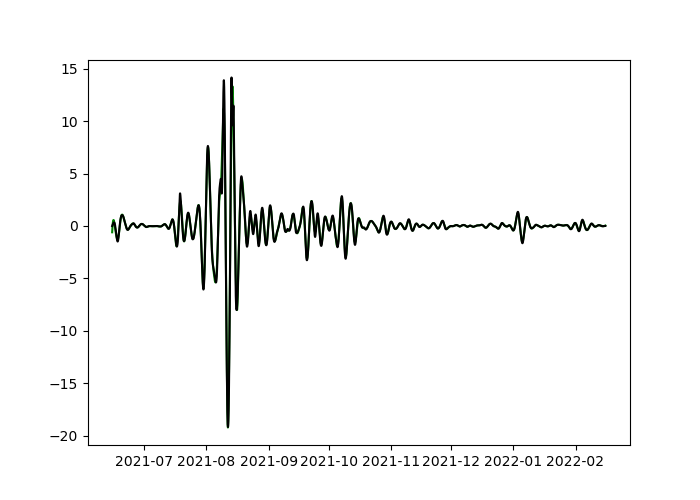

In [83]:
%matplotlib widget
plt.figure(figsize=(7,5))
plt.plot(df['TIMESTAMP'],filterbandpass_force_smooth, 'g')
plt.plot(df['TIMESTAMP'],filterbandpass_Force_3D, 'k')

In [84]:
filterbandpass_force_3D_1der=np.gradient(filterbandpass_force_smooth)

In [85]:
filterbandpass_force_3D_01=[]
for i in np.arange(0, len(filterbandpass_force_3D_1der)):
    if filterbandpass_force_3D_1der[i]>0:
        filterbandpass_force_3D_01.append(1)
    else:
        filterbandpass_force_3D_01.append(-1)


In [86]:
filterbandpass_Force_3D_2der = np.gradient(filterbandpass_force_3D_01)

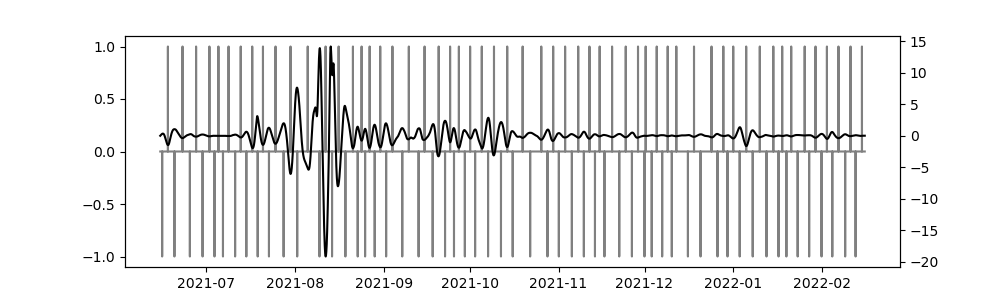

In [87]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df['TIMESTAMP'], filterbandpass_Force_3D_2der, 'grey')
ax1=ax.twinx()
ax1.plot(df['TIMESTAMP'], filterbandpass_Force_3D, 'k')
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/2der_3D.pdf', bbox_inches='tight')

In [88]:
ii_down = np.where(filterbandpass_Force_3D_2der==-1)
ii_up = np.where(filterbandpass_Force_3D_2der==1)

In [89]:
ii_up[0]

array([  385,   386,  1120,  1121,  1801,  1802,  2471,  2472,  2923,
        2924,  3433,  3434,  4044,  4045,  4622,  4623,  5162,  5163,
        5794,  5795,  6546,  6547,  7411,  7412,  8309,  8310,  8964,
        8965,  9683,  9684, 10118, 10119, 10523, 10524, 11054, 11055,
       11667, 11668, 12492, 12493, 13283, 13284, 13992, 13993, 14565,
       14566, 15007, 15008, 15571, 15572, 16158, 16159, 16771, 16772,
       17435, 17436, 18211, 18212, 19147, 19148, 19745, 19746, 20345,
       20346, 21003, 21004, 21568, 21569, 22081, 22082, 22705, 22706,
       23392, 23393, 24008, 24009, 24393, 24394, 24949, 24950, 25500,
       25501, 25933, 25934, 26822, 26823, 27702, 27703, 28295, 28296,
       28793, 28794, 29444, 29445, 30128, 30129, 30807, 30808, 31253,
       31254, 31706, 31707, 32384, 32385, 32929, 32930, 33501, 33502,
       34081, 34082, 34687, 34688, 35261, 35262])

In [90]:
index_down =ii_down[0][0::2]
index_down

index_up =ii_up[0][0::2]
index_up

array([  385,  1120,  1801,  2471,  2923,  3433,  4044,  4622,  5162,
        5794,  6546,  7411,  8309,  8964,  9683, 10118, 10523, 11054,
       11667, 12492, 13283, 13992, 14565, 15007, 15571, 16158, 16771,
       17435, 18211, 19147, 19745, 20345, 21003, 21568, 22081, 22705,
       23392, 24008, 24393, 24949, 25500, 25933, 26822, 27702, 28295,
       28793, 29444, 30128, 30807, 31253, 31706, 32384, 32929, 33501,
       34081, 34687, 35261])

In [91]:
i_up = np.append(index_up, df.index[-1])
i_down = np.append(index_down, df.index[-1])

In [92]:
i_up = np.append(index_up, df.index[-1])
i_down = np.append(index_down, df.index[-1])

In [93]:
idx_up_3D = np.insert(i_up, 0, 0)
idx_down_3D = np.insert(i_down, 0, 0)
idx_up_3D

array([    0,   385,  1120,  1801,  2471,  2923,  3433,  4044,  4622,
        5162,  5794,  6546,  7411,  8309,  8964,  9683, 10118, 10523,
       11054, 11667, 12492, 13283, 13992, 14565, 15007, 15571, 16158,
       16771, 17435, 18211, 19147, 19745, 20345, 21003, 21568, 22081,
       22705, 23392, 24008, 24393, 24949, 25500, 25933, 26822, 27702,
       28295, 28793, 29444, 30128, 30807, 31253, 31706, 32384, 32929,
       33501, 34081, 34687, 35261, 35404])

In [94]:
df

,TIMESTAMP,Time,Force,Pe,kgs09_30_45
0,2021-06-15 00:00:00,37.000000,74.583160,2.798373,2.975580
1,2021-06-15 00:10:00,37.006944,74.557700,2.798397,2.887700
2,2021-06-15 00:20:00,37.013889,74.554782,2.798476,2.731713
3,2021-06-15 00:30:00,37.020833,74.573301,2.798539,2.576763
4,2021-06-15 00:40:00,37.027778,74.580280,2.798597,2.942168
...,...,...,...,...,...
35400,2022-02-15 20:00:00,282.833333,168.646952,2.938285,6.785270
35401,2022-02-15 20:10:00,282.840278,168.663925,2.938275,6.731601
35402,2022-02-15 20:20:00,282.847222,168.655787,2.938237,6.795357
35403,2022-02-15 20:30:00,282.854167,168.648453,2.938243,7.034543


In [95]:
len(idx_up_3D)

59

## Plot for frequencies filtered between 1.5 and 3 days

In [96]:
len(idx_up_3D)

59

In [97]:
# %matplotlib inline
# import matplotlib.dates as mdates
# for i in np.arange(3, df.shape[1]):
#     fig, axs=plt.subplots(11, 6,figsize=(40, 40))
#     fig.subplots_adjust(hspace = .5, wspace=.5)
#     axs=axs.ravel()
#     for j in np.arange(0, len(idx_up_3D)):
#         # ax = fig.add_subplot(nrows, ncols, i+1)
#         if j < len(idx_up_3D)-1:
#             axs[j].plot(df['TIMESTAMP'][idx_up_3D[j]:idx_up_3D[j+1]],
#                     globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[j]:idx_up_3D[j+1]],
#                         'r', label='Force (N)')
#             axs[j].set_xticks([df['TIMESTAMP'][idx_up_3D[j]], df['TIMESTAMP'][idx_up_3D[j+1]]])
#             axs[j].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             axs[j].tick_params(axis='y', labelcolor='r')
#             ax1=axs[j].twinx()
#             ax1.plot(df['TIMESTAMP'][idx_up_3D[j]:idx_up_3D[j+1]],
#                     globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[j]:idx_up_3D[j+1]],
#                      color[i-3], label='%s'%df.columns[i])

#             ax1.set_xticks([df['TIMESTAMP'][idx_up_3D[j]], df['TIMESTAMP'][idx_up_3D[j+1]]])
#             ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             ax1.tick_params(axis='y', labelcolor=color[i-3])
#         else:
#             # ax = fig.add_subplot(nrows, ncols, i+1)
#             axs[j].plot(df['TIMESTAMP'][idx_up_3D[-2]:idx_up_3D[-1]],
#                     globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[-2]:idx_up_3D[-1]],
#                         'r', label='Force (N)')
#             axs[j].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             axs[j].tick_params(axis='y', labelcolor='r')
#             ax1=axs[j].twinx()
#             ax1.plot(df['TIMESTAMP'][idx_up_3D[-2]:idx_up_3D[-1]],
#                     globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[-2]:idx_up_3D[-1]],
#                      color[i-3], label='%s'%df.columns[i])
#             ax1.set_xticks([df['TIMESTAMP'][idx_up_3D[-2]], df['TIMESTAMP'][idx_up_3D[-1]]])
#             ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             ax1.tick_params(axis='y', labelcolor=color[i-3])
#     plt.suptitle('Force (red)/%s'%df.columns[i], fontsize=15)
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/%s_bandpass_3D.pdf'%df.columns[i], bbox_inches='tight')

In [98]:
# for i in np.arange(3, df.shape[1]):
#     fig, axs=plt.subplots(11, 6,figsize=(40, 40))
#     fig.subplots_adjust(hspace = .5, wspace=.5)
#     axs=axs.ravel()
#     for j in np.arange(0, len(idx_up_3D)):
#         # print(i)
#         if j < len(idx_up_3D)-1:
#             axs[j].scatter(globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[j]:idx_up_3D[j+1]], 
#                            globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[j]:idx_up_3D[j+1]],
#                            c= df['TIMESTAMP'][idx_up_3D[j]:idx_up_3D[j+1]], cmap = 'viridis')
#         else:
#             axs[j].scatter(globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[-2]:idx_up_3D[-1]],
#                             globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[-2]:idx_up_3D[-1]],
#                             c= df['TIMESTAMP'][idx_up_3D[-2]:idx_up_3D[-1]], cmap = 'viridis')
#     plt.suptitle('Hysteresis Force (x axis)/%s(y axis)'%df.columns[i], fontsize=15)
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/%s_hysteresis_3D.pdf'%df.columns[i], bbox_inches='tight')

In [99]:
len(idx_up_diurnal)

154

In [100]:
12*12

144

## Plot for frequencies filtered between 5h and 1.5 day

In [101]:
# %matplotlib agg
# import matplotlib.dates as mdates
# for i in np.arange(3, df.shape[1]):
#     fig, axs=plt.subplots(12, 13,figsize=(100, 100))
#     fig.subplots_adjust(hspace = .5, wspace=.5)
#     axs=axs.ravel()
#     for j in np.arange(0, len(idx_up_diurnal)):
#         # ax = fig.add_subplot(nrows, ncols, i+1)
#         if j < len(idx_up_diurnal)-1:
#             axs[j].plot(df['TIMESTAMP'][idx_up_diurnal[j]:idx_up_diurnal[j+1]],
#                     globals()['filterbandpass_%s_diurnal'%df.columns[2]][idx_up_diurnal[j]:idx_up_diurnal[j+1]],
#                         'r', label='Force (N)')
#             axs[j].set_xticks([df['TIMESTAMP'][idx_up_diurnal[j]], df['TIMESTAMP'][idx_up_diurnal[j+1]]])
#             axs[j].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             axs[j].tick_params(axis='y', labelcolor='r')
#             ax1=axs[j].twinx()
#             ax1.plot(df['TIMESTAMP'][idx_up_diurnal[j]:idx_up_diurnal[j+1]],
#                     globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[j]:idx_up_diurnal[j+1]],
#                      color[i-3], label='%s'%df.columns[i])

#             ax1.set_xticks([df['TIMESTAMP'][idx_up_diurnal[j]], df['TIMESTAMP'][idx_up_diurnal[j+1]]])
#             ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             ax1.tick_params(axis='y', labelcolor=color[i-3])
#         else:
#             # ax = fig.add_subplot(nrows, ncols, i+1)
#             axs[j].plot(df['TIMESTAMP'][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                     globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                         'r', label='Force (N)')
#             axs[j].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             axs[j].tick_params(axis='y', labelcolor='r')
#             ax1=axs[j].twinx()
#             ax1.plot(df['TIMESTAMP'][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                     globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                      color[i-3], label='%s'%df.columns[i])
#             ax1.set_xticks([df['TIMESTAMP'][idx_up_diurnal[-2]], df['TIMESTAMP'][idx_up_diurnal[-1]]])
#             ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m-%H'))
#             ax1.tick_params(axis='y', labelcolor=color[i-3])
#     plt.suptitle('Force (red)/%s'%df.columns[i], fontsize=15)
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/%s_bandpass_diurnal.pdf'%df.columns[i], bbox_inches='tight')

In [102]:
# for i in np.arange(3, df.shape[1]):
#     fig, axs=plt.subplots(12, 13,figsize=(100, 100))
#     fig.subplots_adjust(hspace = .5, wspace=.5)
#     axs=axs.ravel()
#     for j in np.arange(0, len(idx_up_diurnal)):
#         # print(i)
#         if j < len(idx_up_diurnal)-1:
#             axs[j].scatter(globals()['filterbandpass_%s_diurnal'%df.columns[2]][idx_up_diurnal[j]:idx_up_diurnal[j+1]], 
#                            globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[j]:idx_up_diurnal[j+1]],
#                            c= df['TIMESTAMP'][idx_up_diurnal[j]:idx_up_diurnal[j+1]], cmap = 'viridis')
#         else:
#             axs[j].scatter(globals()['filterbandpass_%s_diurnal'%df.columns[2]][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                             globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[-2]:idx_up_diurnal[-1]],
#                             c= df['TIMESTAMP'][idx_up_diurnal[-2]:idx_up_diurnal[-1]], cmap = 'viridis')
#     plt.suptitle('Hysteresis Force (x axis)/%s(y axis)'%df.columns[i], fontsize=15)
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/%s_hysteresis_diurnal.pdf'%df.columns[i], bbox_inches='tight')

# Calculate lag for event

## For frequencies 1.5 day to 3 days

In [103]:
for i in np.arange(3, df.shape[1]):
    globals()['dt_%s_3D'%df.columns[i]]=[]
    globals()['t_%s_3D'%df.columns[i]]=[]
    for j in np.arange(0, len(idx_up_3D)):
        if j<len(idx_up_3D)-1:
            max_xForce = np.where(globals()['filterbandpass_%s_3D'%df.columns[2]]==
                                  np.amax(globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[j]:idx_up_3D[j+1]]))[0][0]
            max_x = np.where(globals()['filterbandpass_%s_3D'%df.columns[i]]==
                             np.amax(globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[j]:idx_up_3D[j+1]]))[0][0]
            globals()['t_%s_3D'%df.columns[i]].append(round((idx_up_3D[j]+idx_up_3D[j+1])/2))
            globals()['dt_%s_3D'%df.columns[i]].append(df['TIMESTAMP'][max_xForce]-df['TIMESTAMP'][max_x])
        else:
            max_xForce = np.where(globals()['filterbandpass_%s_3D'%df.columns[2]]==
                                  np.amax(globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[-2]:idx_up_3D[-1]]))[0][0]
            max_x = np.where(globals()['filterbandpass_%s_3D'%df.columns[i]]==
                             np.amax(globals()['filterbandpass_%s_3D'%df.columns[i]][idx_up_3D[-2]:idx_up_3D[-1]]))[0][0]
            globals()['t_%s_3D'%df.columns[i]].append(round((idx_up_3D[-2]+idx_up_3D[-1])/2))
            globals()['dt_%s_3D'%df.columns[i]].append(df['TIMESTAMP'][max_xForce]-df['TIMESTAMP'][max_x])


In [104]:
dt_Pe_3D

[Timedelta('-2 days +05:40:00'),
 Timedelta('-3 days +12:30:00'),
 Timedelta('2 days 19:50:00'),
 Timedelta('-1 days +00:50:00'),
 Timedelta('-1 days +05:20:00'),
 Timedelta('1 days 19:20:00'),
 Timedelta('-2 days +02:10:00'),
 Timedelta('0 days 01:10:00'),
 Timedelta('-1 days +09:30:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('-2 days +02:40:00'),
 Timedelta('-3 days +04:00:00'),
 Timedelta('-2 days +01:30:00'),
 Timedelta('1 days 19:00:00'),
 Timedelta('2 days 03:50:00'),
 Timedelta('1 days 15:10:00'),
 Timedelta('-2 days +10:40:00'),
 Timedelta('1 days 07:30:00'),
 Timedelta('1 days 15:30:00'),
 Timedelta('3 days 06:50:00'),
 Timedelta('-2 days +02:20:00'),
 Timedelta('-1 days +01:10:00'),
 Timedelta('0 days 02:50:00'),
 Timedelta('-1 days +02:00:00'),
 Timedelta('-1 days +13:40:00'),
 Timedelta('1 days 18:50:00'),
 Timedelta('-1 days +03:20:00'),
 Timedelta('2 days 12:00:00'),
 Timedelta('-3 days +03:00:00'),
 Timedelta('2 days 18:10:00'),
 Timedelta('2 days 07:10:00'),
 Timede

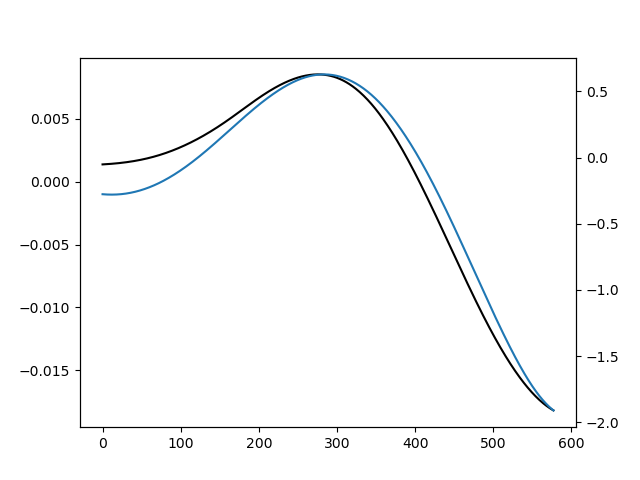

In [105]:
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(globals()['filterbandpass_%s_3D'%df.columns[3]][idx_up_3D[7]:idx_up_3D[8]], 'k')
ax2.plot(globals()['filterbandpass_%s_3D'%df.columns[2]][idx_up_3D[7]:idx_up_3D[8]])

In [106]:
# color=['g', 'b']
# m=['-', '-']
# fig, ax = plt.subplots(figsize=(10,5))
# for i in np.arange(3, df.shape[1]):
# # for i in np.arange(3, 4):
#     globals()['time_%s_3D'%df.columns[i]]=[]
#     for j in np.arange(0,len(globals()['t_%s_3D'%df.columns[i]])):
#         globals()['time_%s_3D'%df.columns[i]].append(df['TIMESTAMP'][globals()['t_%s_3D'%df.columns[i]][j]])

#     delta_t_3D = pd.DataFrame({'Time':globals()['time_%s_3D'%df.columns[i]],
#                             'Delta':globals()['dt_%s_3D'%df.columns[i]]})
#     ax.plot(delta_t_3D['Time'], delta_t_3D['Delta']/np.timedelta64(1, 'h'), color[i-3],
#             linestyle=m[i-3], label='%s'%df.columns[i])
#     ax.legend()
#     ax.set_ylabel('$\delta t$ (h)')
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/deltat_3D.pdf', bbox_inches='tight')

## For frequencies 5h to 1.5 days

In [107]:
df

,TIMESTAMP,Time,Force,Pe,kgs09_30_45
0,2021-06-15 00:00:00,37.000000,74.583160,2.798373,2.975580
1,2021-06-15 00:10:00,37.006944,74.557700,2.798397,2.887700
2,2021-06-15 00:20:00,37.013889,74.554782,2.798476,2.731713
3,2021-06-15 00:30:00,37.020833,74.573301,2.798539,2.576763
4,2021-06-15 00:40:00,37.027778,74.580280,2.798597,2.942168
...,...,...,...,...,...
35400,2022-02-15 20:00:00,282.833333,168.646952,2.938285,6.785270
35401,2022-02-15 20:10:00,282.840278,168.663925,2.938275,6.731601
35402,2022-02-15 20:20:00,282.847222,168.655787,2.938237,6.795357
35403,2022-02-15 20:30:00,282.854167,168.648453,2.938243,7.034543


In [108]:
for i in np.arange(3, df.shape[1]):
    globals()['dt_%s_diurnal'%df.columns[i]]=[]
    globals()['t_%s_diurnal'%df.columns[i]]=[]
    for j in np.arange(0, len(idx_up_diurnal)):
        if j<len(idx_up_diurnal)-1:
            max_xForce = np.where(globals()['filterbandpass_%s_diurnal'%df.columns[2]]==
                                  np.amax(globals()['filterbandpass_%s_diurnal'%df.columns[2]][idx_up_diurnal[j]:idx_up_diurnal[j+1]]))[0][0]
            max_x = np.where(globals()['filterbandpass_%s_diurnal'%df.columns[i]]==
                             np.amax(globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[j]:idx_up_diurnal[j+1]]))[0][0]
            globals()['t_%s_diurnal'%df.columns[i]].append(round((idx_up_diurnal[j]+idx_up_diurnal[j+1])/2))
            globals()['dt_%s_diurnal'%df.columns[i]].append(df['TIMESTAMP'][max_xForce]-df['TIMESTAMP'][max_x])
        else:
            max_xForce = np.where(globals()['filterbandpass_%s_diurnal'%df.columns[2]]==
                                  np.amax(globals()['filterbandpass_%s_diurnal'%df.columns[2]][idx_up_diurnal[-2]:idx_up_diurnal[-1]]))[0][0]
            max_x = np.where(globals()['filterbandpass_%s_diurnal'%df.columns[i]]==
                             np.amax(globals()['filterbandpass_%s_diurnal'%df.columns[i]][idx_up_diurnal[-2]:idx_up_diurnal[-1]]))[0][0]
            globals()['t_%s_diurnal'%df.columns[i]].append(round((idx_up_diurnal[-2]+idx_up_diurnal[-1])/2))
            globals()['dt_%s_diurnal'%df.columns[i]].append(df['TIMESTAMP'][max_xForce]-df['TIMESTAMP'][max_x])


In [109]:
dt_Pe_diurnal

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 12:20:00'),
 Timedelta('-2 days +19:10:00'),
 Timedelta('-1 days +12:20:00'),
 Timedelta('0 days 14:20:00'),
 Timedelta('0 days 05:30:00'),
 Timedelta('-1 days +00:00:00'),
 Timedelta('-1 days +23:40:00'),
 Timedelta('-1 days +04:50:00'),
 Timedelta('0 days 19:10:00'),
 Timedelta('0 days 17:10:00'),
 Timedelta('-1 days +08:40:00'),
 Timedelta('0 days 22:40:00'),
 Timedelta('-1 days +21:50:00'),
 Timedelta('-1 days +01:50:00'),
 Timedelta('0 days 06:30:00'),
 Timedelta('-1 days +18:10:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-1 days +20:30:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('-1 days +06:40:00'),
 Timedelta('-2 days +19:40:00'),
 Timedelta('1 days 07:00:00'),
 Timedelta('-1 days +14:20:00'),
 Timedelta('-1 days +00:40:00'),
 Timedelta('0 days 03:20:00'),
 Timedelta('-1 days +09:20:00'),
 Timedelta('-2 days +22:20:00'),
 Timedelta('0 days 12:00:00'),
 Timedelta('-1 days +18:00:00'),
 Timedelta('-1 days +10:00:00'),
 Ti

In [110]:
# delta_t_diurnal['Delta'].shape

In [111]:
# color=['g', 'b']
# m=['-', '-']
# fig, ax = plt.subplots(figsize=(10,5))
# for i in np.arange(3, df.shape[1]):
# # for i in np.arange(3, 4):
#     globals()['time_%s_diurnal'%df.columns[i]]=[]
#     for j in np.arange(0,len(globals()['t_%s_diurnal'%df.columns[i]])):
#         globals()['time_%s_diurnal'%df.columns[i]].append(df['TIMESTAMP'][globals()['t_%s_diurnal'%df.columns[i]][j]])

#     delta_t_diurnal = pd.DataFrame({'Time':globals()['time_%s_diurnal'%df.columns[i]],
#                             'Delta':globals()['dt_%s_diurnal'%df.columns[i]]})
#     ax.plot(delta_t_diurnal['Time'], delta_t_diurnal['Delta']/np.timedelta64(1, 'h'), color[i-3],
#             linestyle=m[i-3], label='%s'%df.columns[i])
#     ax.legend()
#     ax.set_ylabel('$\delta t$ (h)')
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/deltat_diurnal.pdf', bbox_inches='tight')

# Calculate the hysteresis

## Frequencies for 1.5 to 3 days

In [112]:
i_up_3D = idx_up_3D[0:-1]
i_up_3D

array([    0,   385,  1120,  1801,  2471,  2923,  3433,  4044,  4622,
        5162,  5794,  6546,  7411,  8309,  8964,  9683, 10118, 10523,
       11054, 11667, 12492, 13283, 13992, 14565, 15007, 15571, 16158,
       16771, 17435, 18211, 19147, 19745, 20345, 21003, 21568, 22081,
       22705, 23392, 24008, 24393, 24949, 25500, 25933, 26822, 27702,
       28295, 28793, 29444, 30128, 30807, 31253, 31706, 32384, 32929,
       33501, 34081, 34687, 35261])

In [113]:
i_down_3D = idx_down_3D[1:-1]
i_down_3D

array([   96,   713,  1489,  2127,  2726,  3152,  3762,  4326,  4897,
        5463,  6200,  6882,  8003,  8633,  9304,  9923, 10294, 10777,
       11351, 12161, 12983, 13690, 14311, 14761, 15307, 15822, 16473,
       17122, 17711, 18588, 19459, 20030, 20684, 21287, 21845, 22321,
       23065, 23702, 24333, 24697, 25222, 25706, 26516, 27151, 28004,
       28506, 29118, 29772, 30465, 31070, 31465, 32031, 32608, 33231,
       33771, 34418, 34941])

In [114]:
filterbandpass_Pe_3D.mean()

1.1052269672468818e-06

In [115]:
# color=['g', 'b']
# m=['-', '-']
# fig, ax = plt.subplots(figsize=(13,5))

# # for i in np.arange(3, 4):
# for i in np.arange(3, df.shape[1]):
#     globals()['theta_%s_3D'%df.columns[i]]=[]
#     for j in np.arange(0, len(i_up_3D)):
#         # for k in np.arange(0, len(i_down_3D)):
#         if j<len(i_up_3D)-1:
#             rising = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_up_3D[j]:i_down_3D[j]])
#             # print(rising)
#             falling = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_down_3D[j]:i_up_3D[j+1]])
#             globals()['theta_%s_3D'%df.columns[i]].append((rising-falling)/falling)
#             # print(globals()['theta_%s_3D'%df.columns[i]])
#         else:
#             rising = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_up_3D[-2]:i_down_3D[-1]])
#             falling = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_down_3D[-1]:i_up_3D[-1]])
#             globals()['theta_%s_3D'%df.columns[i]].append((rising-falling)/falling)
                
#     ax.plot(globals()['time_%s_3D'%df.columns[i]][:-1], globals()['theta_%s_3D'%df.columns[i]], color[i-3],
#             linestyle=m[i-3], label='%s'%df.columns[i])
#     ax.legend()
#     ax.set_ylabel('$ \phi $ ')
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/theta_3D.pdf', bbox_inches='tight')

In [116]:
theta_Pe_diurnal

NameError: name 'theta_Pe_diurnal' is not defined

In [117]:
i_up_3D

array([    0,   385,  1120,  1801,  2471,  2923,  3433,  4044,  4622,
        5162,  5794,  6546,  7411,  8309,  8964,  9683, 10118, 10523,
       11054, 11667, 12492, 13283, 13992, 14565, 15007, 15571, 16158,
       16771, 17435, 18211, 19147, 19745, 20345, 21003, 21568, 22081,
       22705, 23392, 24008, 24393, 24949, 25500, 25933, 26822, 27702,
       28295, 28793, 29444, 30128, 30807, 31253, 31706, 32384, 32929,
       33501, 34081, 34687, 35261])

In [118]:
i_down_3D

array([   96,   713,  1489,  2127,  2726,  3152,  3762,  4326,  4897,
        5463,  6200,  6882,  8003,  8633,  9304,  9923, 10294, 10777,
       11351, 12161, 12983, 13690, 14311, 14761, 15307, 15822, 16473,
       17122, 17711, 18588, 19459, 20030, 20684, 21287, 21845, 22321,
       23065, 23702, 24333, 24697, 25222, 25706, 26516, 27151, 28004,
       28506, 29118, 29772, 30465, 31070, 31465, 32031, 32608, 33231,
       33771, 34418, 34941])

In [119]:
idx_up_diurnal

array([    0,    44,   406,   699,   861,  1058,  1137,  1422,  1677,
        1867,  2108,  2266,  2456,  2691,  2837,  3084,  3296,  3465,
        3544,  3739,  3852,  4025,  4373,  4757,  4972,  5313,  5523,
        5749,  6181,  6306,  6664,  6911,  7138,  7535,  7716,  7899,
        8147,  8315,  8456,  8642,  8825,  9146,  9367,  9628,  9737,
       10150, 10490, 10907, 11175, 11392, 11578, 11694, 11961, 12208,
       12391, 12699, 12824, 12971, 13163, 13313, 13413, 13601, 13911,
       14079, 14293, 14582, 14898, 15027, 15200, 15346, 15484, 15645,
       15773, 15969, 16212, 16413, 16721, 17043, 17403, 17726, 17931,
       18195, 18346, 18564, 18850, 19122, 19370, 19658, 19840, 20012,
       20243, 20466, 20771, 20980, 21145, 21447, 21605, 21830, 22032,
       22347, 22513, 22727, 23045, 23235, 23605, 23904, 24205, 24413,
       24565, 24721, 24957, 25222, 25495, 25803, 26114, 26394, 26550,
       26739, 26872, 27092, 27354, 27545, 27781, 28118, 28382, 28692,
       29032, 29260,

In [120]:
i_up_diurnal = idx_up_diurnal[1:]
len(i_up_diurnal)

153

In [121]:
i_down_diurnal = idx_down_diurnal[1:]
len(i_down_diurnal)

152

In [122]:
len(i_up_3D)

58

In [123]:
# for i in np.arange(3, 4):
for i in np.arange(3, df.shape[1]):
    globals()['theta_%s_diurnal'%df.columns[i]]=[]
    for j in np.arange(0, len(i_up_diurnal)):
        # for k in np.arange(0, len(i_down_3D)):
        if j<len(i_up_diurnal)-1:
            rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[j]:i_down_diurnal[j]])
            # print(rising)
            falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[j]:i_up_diurnal[j+1]])
            globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)
            # print(globals()['filterbandpass_%s_diurnal'%df.columns[i]])
        else:
            rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[-2]:i_down_diurnal[-1]])
            falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[-1]:i_up_diurnal[-1]])
            globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)

/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [124]:
dt_Pe_diurnal/np.timedelta64(1, 'h')

UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('O') and dtype('<m8[h]')

In [125]:
plt.plot(theta_Pe_diurnal, dt_Pe_diurnal.total_seconds())

AttributeError: 'list' object has no attribute 'total_seconds'

In [ ]:
# color=['g', 'b']
# m=['-', '-']
# fig, ax = plt.subplots(figsize=(13,5))

# # for i in np.arange(3, 4):
# for i in np.arange(3, df.shape[1]):
#     globals()['theta_%s_diurnal'%df.columns[i]]=[]
#     for j in np.arange(0, len(i_up_diurnal)):
#         # for k in np.arange(0, len(i_down_3D)):
#         if j<len(i_up_diurnal)-1:
#             rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[j]:i_down_diurnal[j]])
#             # print(rising)
#             falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[j]:i_up_diurnal[j+1]])
#             globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)
#             # print(globals()['filterbandpass_%s_diurnal'%df.columns[i]])
#         else:
#             rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[-2]:i_down_diurnal[-1]])
#             falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[-1]:i_up_diurnal[-1]])
#             globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)
                
#     ax.plot(globals()['time_%s_diurnal'%df.columns[i]][:-1], globals()['theta_%s_diurnal'%df.columns[i]], color[i-3],
#             linestyle=m[i-3], label='%s'%df.columns[i])
#     ax.legend()
#     ax.set_ylim([-90, 40])
#     ax.set_ylabel('$ \phi $ ')
#     plt.tight_layout()
#     plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/theta_diurnal.pdf', bbox_inches='tight')

In [ ]:
theta_Pe_diurnal

# Combine dt and phi plot

## Frequencies 5h to 1.5 day

/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-09-23 06:20:00


/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/colili/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-09-23 06:20:00


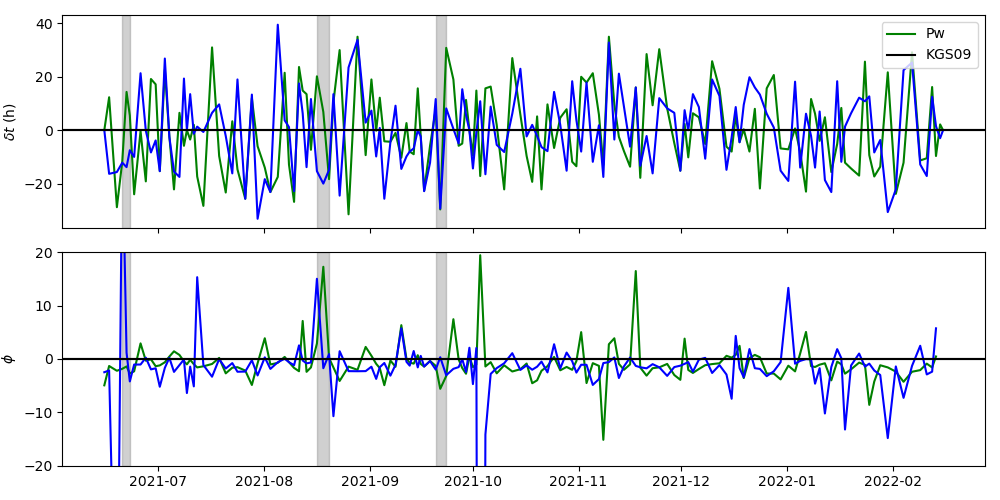

In [172]:
color=['g', 'b']
m=['-', '-']
fig, axs = plt.subplots(2, 1, figsize=(10,5), sharex=True)
for i in np.arange(3, df.shape[1]):
# for i in np.arange(3, 4):
    globals()['time_%s_diurnal'%df.columns[i]]=[]
    globals()['theta_%s_diurnal'%df.columns[i]]=[]
    for j in np.arange(0,len(globals()['t_%s_diurnal'%df.columns[i]])):
        globals()['time_%s_diurnal'%df.columns[i]].append(df['TIMESTAMP'][globals()['t_%s_diurnal'%df.columns[i]][j]])

    for k in np.arange(0, len(i_up_diurnal)):
        # for k in np.arange(0, len(i_down_3D)):
        if k<len(i_up_diurnal)-1:
            rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[k]:i_down_diurnal[k]])
            # print(rising)
            falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[k]:i_up_diurnal[k+1]])
            globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)
            # print(globals()['theta_%s_3D'%df.columns[i]])
        else:
            rising = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_up_diurnal[-2]:i_down_diurnal[-1]])
            falling = np.mean(globals()['filterbandpass_%s_diurnal'%df.columns[i]][i_down_diurnal[-1]:i_up_diurnal[-1]])
            globals()['theta_%s_diurnal'%df.columns[i]].append((rising-falling)/falling)

    delta_t_diurnal = pd.DataFrame({'Time':globals()['time_%s_diurnal'%df.columns[i]],
                            'Delta':globals()['dt_%s_diurnal'%df.columns[i]]})
    axs[0].plot(delta_t_diurnal['Time'], delta_t_diurnal['Delta']/np.timedelta64(1, 'h'), color[i-3],
            linestyle=m[i-3], label='%s'%df.columns[i])
    # axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[0].legend(['Pw', 'KGS09'], loc='upper right')
    print(delta_t_diurnal['Time'][64])
    axs[0].axhline(0, color='k')
    axs[0].axvspan(delta_t_diurnal['Time'][3], delta_t_diurnal['Time'][5], alpha=0.2, color='grey')
    axs[0].axvspan(delta_t_diurnal['Time'][40], delta_t_diurnal['Time'][42], alpha=0.2, color='grey')
    axs[0].axvspan(delta_t_diurnal['Time'][62], delta_t_diurnal['Time'][64], alpha=0.2, color='grey')
    axs[0].set_ylabel('$\delta t$ (h)')

    axs[1].plot(globals()['time_%s_diurnal'%df.columns[i]][:-1], globals()['theta_%s_diurnal'%df.columns[i]], color[i-3],
            linestyle=m[i-3], label='%s'%df.columns[i])
    # axs[1].legend()
    axs[1].axvspan(delta_t_diurnal['Time'][3], delta_t_diurnal['Time'][5], alpha=0.2, color='grey')
    axs[1].axvspan(delta_t_diurnal['Time'][40], delta_t_diurnal['Time'][42], alpha=0.2, color='grey')
    axs[1].axvspan(delta_t_diurnal['Time'][62], delta_t_diurnal['Time'][64], alpha=0.2, color='grey')
    axs[1].axhline(0, color='k')
    axs[1].set_ylim([-20, 20])
    axs[1].set_ylabel('$ \phi $ ')

    plt.tight_layout()
    plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/deltat_phi_diurnal.pdf', bbox_inches='tight')

In [ ]:
# delta_t_diurnal['Delta']

In [ ]:
# delta_t_diurnal['Delta']/np.timedelta64(1, 'h')

## Frequencies 1.5 to 3 days

In [ ]:
color=['g', 'b']
m=['-', '-']
fig, axs = plt.subplots(3, 1, figsize=(10,5), sharex=True)
for i in np.arange(3, df.shape[1]):
# for i in np.arange(3, 4):
    globals()['time_%s_3D'%df.columns[i]]=[]
    globals()['theta_%s_3D'%df.columns[i]]=[]
    for j in np.arange(0,len(globals()['t_%s_3D'%df.columns[i]])):
        globals()['time_%s_3D'%df.columns[i]].append(df['TIMESTAMP'][globals()['t_%s_3D'%df.columns[i]][j]])
    
    for k in np.arange(0, len(i_up_3D)):
        # for k in np.arange(0, len(i_down_3D)):
        if k<len(i_up_3D)-1:
            rising = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_up_3D[k]:i_down_3D[k]])
            # print(rising)
            falling = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_down_3D[k]:i_up_3D[k+1]])
            globals()['theta_%s_3D'%df.columns[i]].append((rising-falling)/falling)
            # print(globals()['theta_%s_3D'%df.columns[i]])
        else:
            rising = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_up_3D[-2]:i_down_3D[-1]])
            falling = np.mean(globals()['filterbandpass_%s_3D'%df.columns[i]][i_down_3D[-1]:i_up_3D[-1]])
            globals()['theta_%s_3D'%df.columns[i]].append((rising-falling)/falling)

    delta_t_3D = pd.DataFrame({'Time':globals()['time_%s_3D'%df.columns[i]],
                            'Delta':globals()['dt_%s_3D'%df.columns[i]]})
    axs[0].plot(delta_t_3D['Time'], delta_t_3D['Delta']/np.timedelta64(1, 'h'), color[i-3],
            linestyle=m[i-3], label='%s'%df.columns[i])
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[0].axhline(0, color='k')
    axs[0].set_ylabel('$\delta t$ (h)')
    
    axs[1].plot(globals()['time_%s_3D'%df.columns[i]][:-1], globals()['theta_%s_3D'%df.columns[i]], color[i-3],
            linestyle=m[i-3], label='%s'%df.columns[i])
    # axs[1].legend()
    axs[1].axhline(0, color='k')
    axs[1].set_ylabel('$ \phi $ ')
    
    # axs[2].scatter(delta_t_3D['Delta'][:-1]/np.timedelta64(1, 'h'), globals()['theta_%s_3D'%df.columns[i]],
    #               c= delta_t_3D['Time'][:-1], cmap = 'viridis')
    
    plt.tight_layout()
    plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/deltat_phi_3D.pdf', bbox_inches='tight')

In [ ]:
%matplotlib inline
plt.plot(delta_t_3D['Delta'][1:]/np.timedelta64(1, 'h'), globals()['theta_%s_3D'%df.columns[i]])
plt.show()

In [ ]:
len(theta_Pe_3D)